# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [3]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data = torchvision.datasets.MNIST(root='data', train=True,
                            download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=128,
                          shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root='data', train=False,
                           download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=128)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

To transform the images to tensor arrays for easy interpretation by the network, then normalized the range of values of pixels from a 0 to 255 range to a  0 and 1 range to have my weights in small numbers for fast and easy model learning.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Train Data Images
2


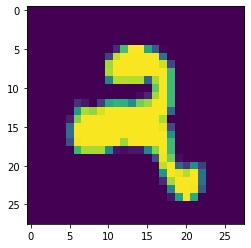

5


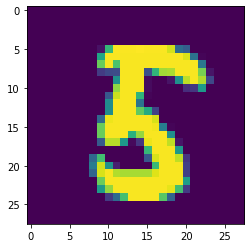

6


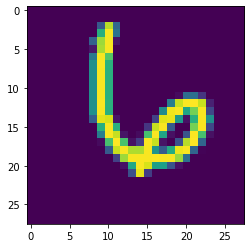

7


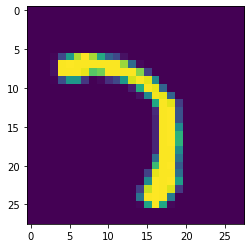

4


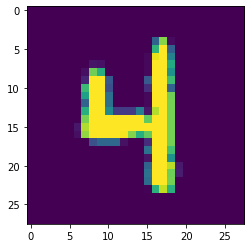

Test Data Images
7


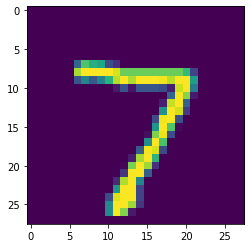

2


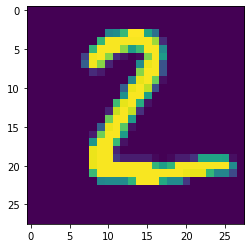

1


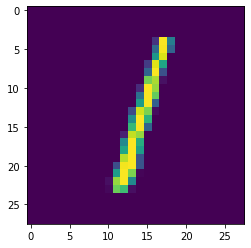

0


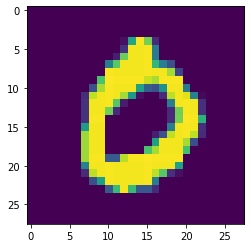

4


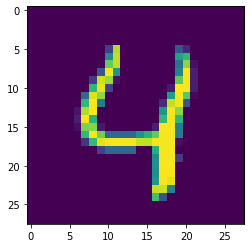

Train data length:
 60000
Test data length:
 10000


In [6]:
# Explore data
## YOUR CODE HERE ##
print("Train Data Images")
show5(train_loader)
print("Test Data Images")
show5(test_loader)
print("Train data length:\n", len(train_data))
print("Test data length:\n", len(test_data))

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [34]:
## YOUR CODE HERE ##
class NetModel(nn.Module):
    
    def __init__(self):
        super(NetModel, self).__init__()
        #self.dropout = nn.Dropout(0.5)
        self.model = nn.Sequential (
            nn.Linear(784, 258),
            nn.ReLU(),
            nn.Linear(258, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        # Returns forward pass
        x = torch.flatten(x, 1)
        return self.model(x)

nnet = NetModel()
#print('Network Model State:')
# or params in network.state_dict():
#arams, '\t', net.state_dict()[params].sizsiz

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [35]:
## YOUR CODE HERE ##
# optimizer for minimizing loss function
optimizer = optim.SGD(nnet.parameters(), lr=0.01, momentum=0.9)

                      # Using Cross entropy loss as loss function
criterion = nn.CrossEntropyLoss()


In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nnet.to(device)

NetModel(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=258, bias=True)
    (1): ReLU()
    (2): Linear(in_features=258, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [37]:
## YOUR CODE HERE ##
num_epochs = 20
train_loss_history = list()


for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_correct = 0
    total_predictions = 0
    nnet.train() # Model in train, changes behaviour of layers 
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() # Zeros the gradients
        
        outputs = nnet(inputs) # Forward pass in network
        loss = criterion(outputs, labels) # Computes the loss function
        loss.backward()
        optimizer.step()
        
        _, pred = torch.max(outputs.data, 1)
   
        epoch_correct += (pred == labels).sum().item()
        
        epoch_loss += loss.item()
        total_samples = len(train_loader.dataset)
        accuracy = (epoch_correct / total_samples) * 100
    print(f"Epoch ({epoch+1} of {num_epochs}), Training acc. {accuracy:.2f}% Loss: {epoch_loss/len(train_loader):.5f}")
    train_loss_history.append(epoch_loss / len(train_loader))
    


Epoch (1 of 20), Training acc. 71.70% Loss: 0.88189
Epoch (2 of 20), Training acc. 90.12% Loss: 0.34538
Epoch (3 of 20), Training acc. 93.44% Loss: 0.23775
Epoch (4 of 20), Training acc. 94.86% Loss: 0.18672
Epoch (5 of 20), Training acc. 95.67% Loss: 0.16048
Epoch (6 of 20), Training acc. 96.24% Loss: 0.13642
Epoch (7 of 20), Training acc. 96.67% Loss: 0.11878
Epoch (8 of 20), Training acc. 97.03% Loss: 0.10820
Epoch (9 of 20), Training acc. 97.41% Loss: 0.09642
Epoch (10 of 20), Training acc. 97.45% Loss: 0.09053
Epoch (11 of 20), Training acc. 97.69% Loss: 0.08128
Epoch (12 of 20), Training acc. 97.94% Loss: 0.07501
Epoch (13 of 20), Training acc. 98.02% Loss: 0.07034
Epoch (14 of 20), Training acc. 98.16% Loss: 0.06448
Epoch (15 of 20), Training acc. 98.33% Loss: 0.06014
Epoch (16 of 20), Training acc. 98.49% Loss: 0.05423
Epoch (17 of 20), Training acc. 98.53% Loss: 0.05144
Epoch (18 of 20), Training acc. 98.55% Loss: 0.04817
Epoch (19 of 20), Training acc. 98.68% Loss: 0.04682
Ep

Plot the training loss (and validation loss/accuracy, if recorded).

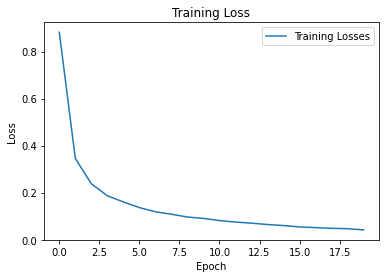

In [38]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label='Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [39]:
## YOUR CODE HERE ##
correct = 0
total = 0
nnet.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = nnet(images)
        i, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * (correct/total)
print(f"Model Accuracy on Test set: {accuracy}%")

Model Accuracy on Test set: 98.06%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [40]:
## YOUR CODE HERE ##
# Model Achieved accuracy beyond 90%
# To improve the model, I will reduce the number of epochs first, it is now
# unnecessary for it to be much, and then reduce the learning rate further
# to 0.0001.

## Saving your model
Using `torch.save`, save your model for future loading.

In [41]:
## YOUR CODE HERE ##
torch.save(nnet, 'model.pth') # Preferred to save whole model architecture